In [ ]:
!pip install pandas_profiling
!pip install category_encoders
!pip install pdpbox
!pip install shap

     |████████████████████████████████| 82 kB 331 kB/s 
     |████████████████████████████████| 34.0 MB 184 kB/s 
     |████████████████████████████████| 13.1 MB 20.9 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=44edd96d14672fb8f181e9b71a7a0bdfcc720fca94dbd72d034de730fbc07bd8
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 564 kB 5.0 MB/s 


In [ ]:
"""
!pip install pandas_profiling
!pip install category_encoders
! pip install pdpbox
! pip install shap
"""

'\n!pip install pandas_profiling\n!pip install category_encoders\n! pip install pdpbox\n! pip install shap\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import shap
import xgboost
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact,pdp_interact_plot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from pandas_profiling import ProfileReport
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,plot_confusion_matrix,f1_score,roc_curve,roc_auc_score,classification_report
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LogisticRegression, Lasso
from sklearn.feature_selection import f_regression, SelectKBest
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dhata/project/Data Science and STEM Salaries/Levels_Fyi_Salary_Data.csv')

#탐색적 데이터 분석과 전처리(EDA & Preprocessing)

##1. 탐색적 데이터 분석과 결측치, 이상치 제거(EDA & Dealing with Missing Values or Outliers)

In [ ]:
df.isna().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp']) # 시간에 따라 STEM 직군 일이 얼마나 제안되는지 확인.

fig = go.Figure()
date_value_counts = df['timestamp'].value_counts()

fig.add_trace(
    go.Histogram(x=date_value_counts.index, y=date_value_counts.values,
                          marker_color='burlywood')

)

fig.update_layout(
                        title=dict(text='STEM jobs in time',
                        font=dict(family='Times New Roman', 
                                  size=24), 
                        x=.5)
)

fig

In [ ]:
df.corr() # 상관관계

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
totalyearlycompensation,1.000000,0.422879,0.165802,0.672865,0.770756,0.489454,-0.110204,0.376346,-0.092622,0.018320,-0.139866,0.097179,-0.014831,-0.003380,-0.080072,-0.027802,-0.009623,-0.026741,-0.026145
yearsofexperience,0.422879,1.000000,0.522611,0.374437,0.289631,0.261051,-0.014100,0.030903,-0.002836,0.060310,-0.069468,-0.005380,0.011605,0.037925,-0.052659,0.064712,-0.013917,-0.022675,-0.002232
yearsatcompany,0.165802,0.522611,1.000000,0.145596,0.089492,0.108122,0.002984,0.043946,-0.012850,0.026109,-0.027487,0.001165,-0.005947,0.005718,-0.025888,0.047267,-0.014926,-0.027812,-0.007511
basesalary,0.672865,0.374437,0.145596,1.000000,0.468266,0.394352,-0.118651,0.425342,0.032603,0.084227,-0.104111,0.104320,-0.008534,0.006494,-0.053759,0.020324,0.002090,-0.008836,-0.008976
stockgrantvalue,0.770756,0.289631,0.089492,0.468266,1.000000,0.248151,-0.072429,0.227608,-0.041226,0.010720,-0.084676,0.080768,-0.008617,-0.001778,-0.040439,-0.020978,-0.006071,-0.029244,-0.020412
bonus,0.489454,0.261051,0.108122,0.394352,0.248151,1.000000,-0.036119,0.143506,-0.014753,0.031538,-0.062881,0.071844,-0.006916,-0.001873,-0.022997,-0.007798,0.001773,-0.004026,-0.006983
cityid,-0.110204,-0.014100,0.002984,-0.118651,-0.072429,-0.036119,1.000000,-0.104870,0.041289,-0.012902,0.053934,-0.018686,-0.012253,-0.005339,0.056143,-0.019097,-0.002999,0.012547,-0.003174
dmaid,0.376346,0.030903,0.043946,0.425342,0.227608,0.143506,-0.104870,1.000000,-0.202626,0.003325,-0.159571,0.040339,-0.038118,-0.009232,-0.093969,-0.087129,-0.009182,-0.005076,-0.010163
rowNumber,-0.092622,-0.002836,-0.012850,0.032603,-0.041226,-0.014753,0.041289,-0.202626,1.000000,0.181295,0.351730,0.029668,0.052255,0.050012,0.358515,0.261340,0.076943,0.068616,0.086191
Masters_Degree,0.018320,0.060310,0.026109,0.084227,0.010720,0.031538,-0.012902,0.003325,0.181295,1.000000,-0.286083,-0.076072,-0.040896,-0.043087,0.305903,0.036552,0.011023,0.014023,0.002330


In [ ]:
df['Bachelors_Degree'].value_counts()

0    50037
1    12605
Name: Bachelors_Degree, dtype: int64

In [ ]:
df['Education'].value_counts()

Master's Degree      15391
Bachelor's Degree    12601
PhD                   1703
Some College           355
Highschool             320
Name: Education, dtype: int64

In [ ]:
df['Race_Asian'].value_counts()

0    50870
1    11772
Name: Race_Asian, dtype: int64

In [ ]:
df['Race'].value_counts()

Asian          11772
White           8032
Hispanic        1129
Two Or More      804
Black            690
Name: Race, dtype: int64

위 결과를 보면 학력을 나타내는 이진 명목형 특성들 ['Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Some_College']이 'Education' 특성에서 인코딩한 것이라고 유추할 수 있다. 마찬가지로 인종 특성에 관련된 열들 ['Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic']도 'Race' 특성을 인코딩 한 것이다. 이 특성들은 결측치가 너무 많은 값에서 비롯됐고, 따라서 결과를 왜곡할 우려가 있다. 다른 결측치가 많은 열과 함께 제거하겠다.

In [ ]:
df=df.drop(columns=['gender','otherdetails','Race','Education',
                    'Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Some_College',
                    'Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic'])

In [ ]:
sns.displot(df['basesalary'], height=6, aspect=3) 

In [ ]:
df['basesalary'].replace(0, int(np.mean(df['basesalary'])), inplace=True) 

위 분포도를 보면 0에 2000개가 넘는 관측치가 있는 것을 볼 수 있다. 이를 처리해주기 위해 이 값들을 'basesalary'의 평균값으로 채워줬다.

In [ ]:
# 'totalyearlycompensation'은 대부분 'basesalary', 'stockgrantvalue', 'bonus'의 합으로 값이 나타나는데, 제대로 되어있지 않는 부분이 간혹 있다. 그리고 위에서 기본급 이상치를 평균값으로 처리해줬으므로 그에 따른 업데이트를 진행한다.
# df['totalyearlycompensation']=df['basesalary']+df['stockgrantvalue']+df['bonus']

In [ ]:
sns.displot(df['totalyearlycompensation'],height=10,aspect=3) 

In [ ]:
highest_income_idx=df[df['totalyearlycompensation']>=0.8e6].index
df=df.drop(highest_income_idx).reset_index(drop=True)

연 총소득이 80만달러가 넘는 값을 제거했다. 평균값과 너무 차이나기 때문에 이상치로 판단했다.

In [ ]:
df['dmaid'].fillna(0,inplace=True) # 결측치 두 개 처리

In [ ]:
df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber
totalyearlycompensation,1.000000,0.432595,0.163508,0.796250,0.805505,0.478117,-0.121399,0.419800,-0.107829
yearsofexperience,0.432595,1.000000,0.522884,0.415869,0.278156,0.252660,-0.012884,0.026510,-0.001806
yearsatcompany,0.163508,0.522884,1.000000,0.172754,0.078646,0.099901,0.003481,0.042520,-0.012460
basesalary,0.796250,0.415869,0.172754,1.000000,0.458668,0.361075,-0.138848,0.499829,-0.095729
stockgrantvalue,0.805505,0.278156,0.078646,0.458668,1.000000,0.220270,-0.075886,0.239737,-0.045856
bonus,0.478117,0.252660,0.099901,0.361075,0.220270,1.000000,-0.036450,0.146309,-0.015622
cityid,-0.121399,-0.012884,0.003481,-0.138848,-0.075886,-0.036450,1.000000,-0.104230,0.041404
dmaid,0.419800,0.026510,0.042520,0.499829,0.239737,0.146309,-0.104230,1.000000,-0.203225
rowNumber,-0.107829,-0.001806,-0.012460,-0.095729,-0.045856,-0.015622,0.041404,-0.203225,1.000000


##2. 특성공학(Feature Engineering)

In [ ]:
common_companies=df.company.value_counts().head(100).index
common_companies_idx=df[df.company.isin(common_companies)].index

ccm_list=[]
def companyCompMean(c):
  compMean=round(df[df['company']==c].totalyearlycompensation.mean())
  return compMean

for company in common_companies:
  x=companyCompMean(company)
  ccm_list.append(x)

salaries_by_companies=pd.DataFrame(data={
    'Big Companies':common_companies,
    'Compensation Mean':ccm_list
})
print('Average Total Compensations by Companies')
salaries_by_companies.sort_values(by='Compensation Mean',ascending=False).head(20)

Average Total Compensations by Companies


,Big Companies,Compensation Mean
31,Netflix,473034
45,Stripe,362698
35,Airbnb,360640
30,Lyft,355625
41,Snap,354831
58,Pinterest,339917
73,Instacart,335746
33,Dropbox,330796
74,Cruise,324146
3,Facebook,319166


In [ ]:
cc_list=[]
for i in df.index:
 
  if i in common_companies_idx:
    cc_list.append(1)
  else:
    cc_list.append(0)

df['common_companies']=pd.DataFrame(cc_list) # 가장 흔한 회사 '50'가지에 해당하는 사람들은 1, 나머지는 0을 갖는 특성을 생성

In [ ]:
df.title.value_counts()

Software Engineer               41101
Product Manager                  4606
Software Engineering Manager     3442
Data Scientist                   2575
Hardware Engineer                2198
Product Designer                 1513
Technical Program Manager        1379
Solution Architect               1156
Management Consultant             973
Business Analyst                  885
Marketing                         709
Mechanical Engineer               490
Sales                             458
Recruiter                         451
Human Resources                   364
Name: title, dtype: int64

In [ ]:
def isSWE(x): # 소프트웨어 엔지니어인지
  if x=='Software Engineer':
    return 1
  else:
    return 0

df['title_SWE']=df.title.apply(isSWE)

In [ ]:
def isSWEM(x): # 소프트웨어 엔지니어 매니저인지
  if x=='Software Engineering Manager':
    return 1
  else:
    return 0

df['title_SWEM']=df.title.apply(isSWEM)

In [ ]:
def isPM(x): # 프로덕트 매니저인지
  if x=='Product Manager':
    return 1
  else:
    return 0

df['title_PM']=df.title.apply(isPM)

In [ ]:
def isDS(x): # 데이터 과학자인지
  if x=='Data Scientist':
    return 1
  else:
    return 0

df['title_DS']=df.title.apply(isDS)

In [ ]:
common_tags=df.tag.value_counts(10).head(15).index # 'tag'에서 가장 흔한 직무 15가지
common_tags_idx=df[df.tag.isin(common_tags)].index
ct_list=[]
for i in df.index:
 
  if i in common_tags_idx:
    ct_list.append(1)
  else:
    ct_list.append(0)

df['common_tags_15']=pd.DataFrame(ct_list) # 가장 흔한 직무 15가지에 해당하는 사람들은 1, 나머지는 0을 갖는 특성을 생성

In [ ]:
df.tag.str.contains('iOS'or'Android'or'Mobile').sum()

2073

In [ ]:
df.tag.str.contains('Web Development').sum()

2966

In [ ]:
def isAndroid(x): # 직무가 안드로이드 개발을 포함하는 경우. Mobile=Android+iOS
  if ('Android' or 'Mobile') in str(x):
    return 1
  else:
    return 0

def isIOS(x): # 직무가 iOS 개발을 포함하는 경우
  if ('iOS' or 'Mobile') in str(x):
    return 1
  else:
    return 0
    
def isWeb(x): # 직무가 웹 개발인 경우
  if 'Web Development' in str(x):
    return 1
  else:
    return 0

def isFullStack(x): # 직무가 풀스택 개발자
  if x=='Full Stack':
    return 1
  else:
    return 0

def isBackEnd(x): # 직무가 백엔드 개발자
  if 'Back-End' in str(x):
    return 1
  else:
    return 0

df['tag_Android']=df.tag.apply(isAndroid)
df['tag_iOS']=df.tag.apply(isIOS)
df['tag_Web']=df.tag.apply(isWeb)
df['tag_Full_Stack']=df.tag.apply(isFullStack)
df['tag_Back_End']=df.tag.apply(isBackEnd) 

In [ ]:
df[df['tag_Back_End']==1] # 확인

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,common_companies,title_SWE,title_SWEM,title_PM,title_DS,common_tags_15,tag_Android,tag_iOS,tag_Web,tag_Full_Stack,tag_Back_End
406,2018-06-04 00:16:01,Oracle,M3,Software Engineering Manager,340000,"Redwood City, CA",16.0,15.0,Distributed Systems (Back-End),206000.0,134000.0,0.0,7392,807.0,794,1,0,1,0,0,1,0,0,0,0,1
409,2018-06-05 12:44:52,Google,L3,Software Engineer,208000,"Mountain View, CA",0.0,0.0,Distributed Systems (Back-End),116000.0,65000.0,17000.0,7322,807.0,805,1,1,0,0,0,1,0,0,0,0,1
410,2018-06-05 12:54:59,Amazon,L5,Software Engineer,240000,"Seattle, WA",5.5,5.5,Distributed Systems (Back-End),130000.0,110000.0,0.0,11527,819.0,807,1,1,0,0,0,1,0,0,0,0,1
411,2018-06-05 12:58:10,Autodesk,11,Software Engineer,131000,"San Francisco, CA",3.0,3.0,API Development (Back-End),122000.0,0.0,9000.0,7419,807.0,808,1,1,0,0,0,1,0,0,0,0,1
413,2018-06-05 13:21:08,Cisco,10,Software Engineer,165000,"Waltham, MA",10.0,1.0,API Development (Back-End),131000.0,15000.0,20000.0,8893,506.0,810,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62280,2018-08-18 13:38:06,VMware,Staff Engineer 1,Software Engineer,250000,"Boston, MA",18.0,5.0,Distributed Systems (Back-End),175000.0,50000.0,30000.0,8816,506.0,1546,1,1,0,0,0,1,0,0,0,0,1
62288,2018-08-28 21:38:58,Microsoft,64,Software Engineering Manager,250000,"Seattle, WA",7.0,7.0,Distributed Systems (Back-End),180000.0,25000.0,45000.0,11527,819.0,1739,1,0,1,0,0,1,0,0,0,0,1
62292,2018-09-05 12:37:41,Amazon,L5,Software Engineer,213000,"Seattle, WA",6.0,4.0,Distributed Systems (Back-End),147500.0,38000.0,35000.0,11527,819.0,1843,1,1,0,0,0,1,0,0,0,0,1
62293,2018-09-06 21:24:41,amazon,sde2,Software Engineer,170000,"Seattle, WA",2.0,2.0,Distributed Systems (Back-End),130000.0,27000.0,13000.0,11527,819.0,1888,0,1,0,0,0,1,0,0,0,0,1


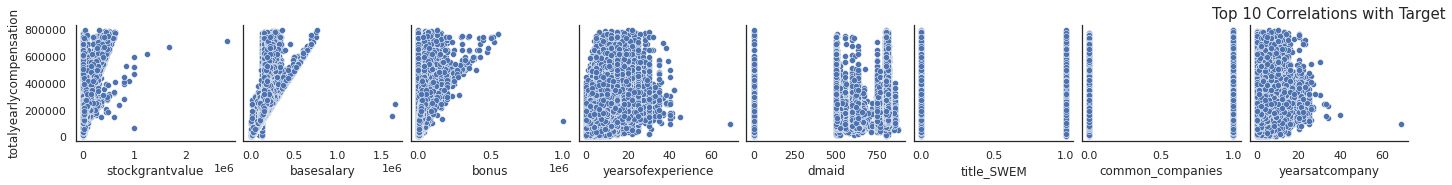

In [ ]:
%matplotlib inline
top_corr_name = df.corr()['totalyearlycompensation'].sort_values(ascending=False).reset_index()['index'][:9].values
sns.pairplot(df[top_corr_name], x_vars=top_corr_name[1:], y_vars=top_corr_name[0])
plt.title('Top 10 Correlations with Target', fontsize=15)
plt.show()

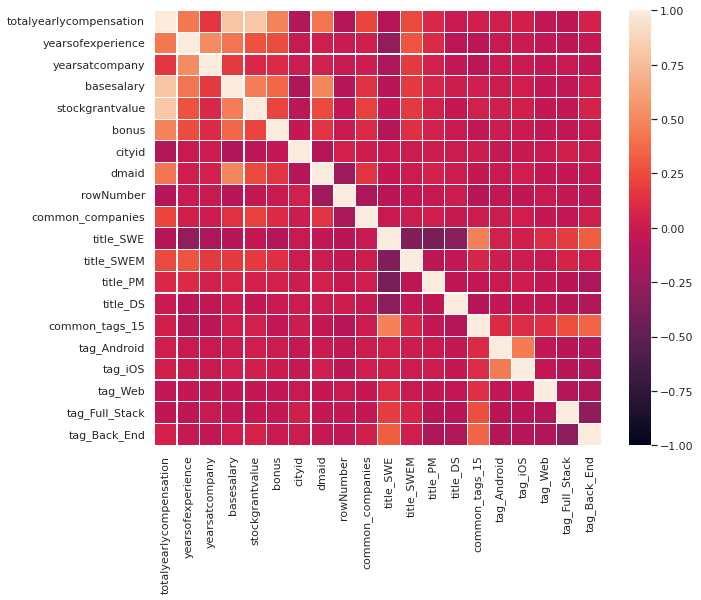

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, linewidths=.2)
plt.show()

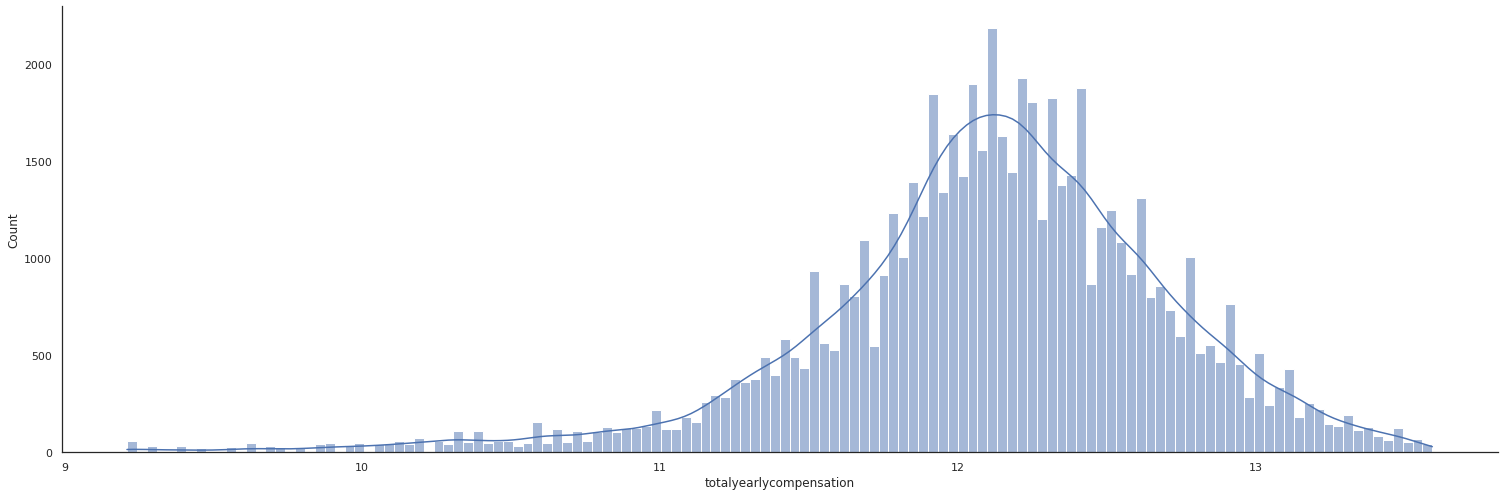

In [ ]:
target='totalyearlycompensation' # 기본급과 상여금 등 각종 수당을 포함한 연봉
sns.displot(np.log(df[target]),height=7, aspect=3,kde=True) # 로그 변환한 타겟 데이터의 분포

In [ ]:
df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,common_companies,title_SWE,title_SWEM,title_PM,title_DS,common_tags_15,tag_Android,tag_iOS,tag_Web,tag_Full_Stack,tag_Back_End
totalyearlycompensation,1.000000,0.432595,0.163508,0.796250,0.805505,0.478117,-0.121399,0.419800,-0.107829,0.220252,-0.102346,0.235355,0.079642,-0.015539,0.037809,0.023763,0.035156,-0.046985,-0.059005,0.049001
yearsofexperience,0.432595,1.000000,0.522884,0.415869,0.278156,0.252660,-0.012884,0.026510,-0.001806,0.033476,-0.262838,0.282139,0.094970,-0.075328,-0.078035,-0.012465,-0.002496,-0.038467,-0.061871,-0.020761
yearsatcompany,0.163508,0.522884,1.000000,0.172754,0.078646,0.099901,0.003481,0.042520,-0.012460,0.015230,-0.163047,0.176268,0.045886,-0.040389,-0.071981,-0.015041,-0.011508,-0.039531,-0.012504,-0.039972
basesalary,0.796250,0.415869,0.172754,1.000000,0.458668,0.361075,-0.138848,0.499829,-0.095729,0.140532,-0.100609,0.173013,0.071902,0.008433,0.018910,0.001921,0.020219,-0.031879,-0.050779,0.027069
stockgrantvalue,0.805505,0.278156,0.078646,0.458668,1.000000,0.220270,-0.075886,0.239737,-0.045856,0.200534,-0.038811,0.179297,0.047574,-0.024998,0.042917,0.028751,0.034660,-0.034648,-0.045588,0.055633
bonus,0.478117,0.252660,0.099901,0.361075,0.220270,1.000000,-0.036450,0.146309,-0.015622,0.099875,-0.116231,0.129406,0.044261,-0.012067,-0.039418,0.000550,-0.002432,-0.037976,-0.040685,-0.015428
cityid,-0.121399,-0.012884,0.003481,-0.138848,-0.075886,-0.036450,1.000000,-0.104230,0.041404,0.012842,-0.012851,0.004421,0.013862,0.003922,0.010109,-0.019375,-0.021081,-0.008179,0.032940,0.004025
dmaid,0.419800,0.026510,0.042520,0.499829,0.239737,0.146309,-0.104230,1.000000,-0.203225,0.148030,-0.038877,0.005381,0.052499,0.003950,-0.023836,-0.001660,0.023175,-0.027034,-0.034427,-0.019304
rowNumber,-0.107829,-0.001806,-0.012460,-0.095729,-0.045856,-0.015622,0.041404,-0.203225,1.000000,-0.159260,-0.085237,-0.032666,-0.017652,0.014968,-0.101150,-0.042295,-0.056185,-0.014760,-0.030832,-0.047319
common_companies,0.220252,0.033476,0.015230,0.140532,0.200534,0.099875,0.012842,0.148030,-0.159260,1.000000,-0.011044,0.012676,0.029014,-0.019307,0.007720,0.009714,0.016651,-0.025620,-0.043150,0.034097


# 기준모델

In [ ]:
baseline=round(df[target].mean())
errors=baseline-df[target]
mean_absolute_error_base=errors.abs().mean()
print(f'이 회귀 문제의 기준모델을 타겟의 평균값인 ${baseline}으로 정할 수 있다. 이 때 MAE는 {round(mean_absolute_error_base)}이다.')

이 회귀 문제의 기준모델을 타겟의 평균값인 $211705으로 정할 수 있다. 이 때 MAE는 87797이다.


#머신러닝 모델링

##1. 다중선형 회귀

In [ ]:
np.delete(top_corr_name,0)

array(['stockgrantvalue', 'basesalary', 'bonus', 'yearsofexperience',
       'dmaid', 'title_SWEM', 'common_companies', 'yearsatcompany'],
      dtype=object)

In [ ]:
features=['stockgrantvalue', 'basesalary', 'bonus', 'yearsofexperience',
       'dmaid', 'common_companies', 'title_SWEM', 'yearsatcompany']
df[features].isna().sum()

stockgrantvalue      0
basesalary           0
bonus                0
yearsofexperience    0
dmaid                0
common_companies     0
title_SWEM           0
yearsatcompany       0
dtype: int64

In [ ]:
train, test=train_test_split(df, test_size=0.2, random_state=42)
X_train=train[features]
y_train=train[target]

X_test=test[features]
y_test=test[target]

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rsq = r2_score(y_test,y_pred)

In [ ]:
mse, mae, rsq

(1311273847.5610363, 12259.780870008171, 0.9064710485723488)

In [ ]:
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: -7832.598324805702
Coefficient of the line: [ 8.64133786e-01  9.87515893e-01  8.23934062e-01  9.63807070e+02
  1.56323215e+01  7.19866412e+03  1.40953176e+04 -1.47132195e+02]


##2. 릿지 회귀(Ridge Regression)

In [ ]:
train2, test2=train_test_split(df, test_size=0.2, random_state=42)
X_train2=train2[features]
y_train2=train2[target]

X_test2=test2[features]
y_test2=test2[target]

In [ ]:
selector=SelectKBest(score_func=f_regression, k=8)
X_train_selected=selector.fit_transform(X_train2, y_train2)
X_test_selected=selector.transform(X_test2)
vars=X_train2.columns
sel_mask=selector.get_support()
scores=selector.scores_[sel_mask]

name_df=pd.DataFrame(vars,columns=['Name'])
score_df=pd.DataFrame(scores, columns=['Score'])
selected = pd.concat([name_df, score_df], axis=1)
selected[sel_mask]

,Name,Score
0,stockgrantvalue,91434.277011
1,basesalary,88313.387860
2,bonus,14622.482706
3,yearsofexperience,11345.436451
4,dmaid,10800.403883
5,common_companies,2576.672178
6,title_SWEM,2844.866970
7,yearsatcompany,1391.470608


In [ ]:
alphas = [0, 0.001, 0.01, 0.1, 1] 
ridge=RidgeCV(alphas=alphas,normalize=True, cv=5); # RidgeCV를 이용한 교차검증
ridge.fit(X_train_selected, y_train2);
ridge.alpha_, ridge.best_score_ # 가장 높은 결정계수

(0.001, 0.9141304136833543)

In [ ]:
y_pred2=ridge.predict(X_test_selected)
mae2=mean_absolute_error(y_test2,y_pred2)
mae2=round(float(mae))
mae2

12260

##3. 랜덤포레스트(Random Forest)

In [ ]:
train3, test3=train_test_split(df, test_size=0.2, random_state=42)
train3, val3=train_test_split(train3, test_size=0.2, random_state=42)

X_train3=train3[features]
y_train3=train3[target]
"""
X_val3=val3[features]
y_val3=val3[target]
"""
X_test3=test3[features]
y_test3=test3[target]
'''
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    StandardScaler(),
    RandomForestRegressor(n_jobs=-1, random_state=42, max_depth=20, oob_score=True, n_estimators=1)
)

pipe.fit(X_train3, y_train3)

print('훈련세트 정확도', pipe.score(X_train3, y_train3))
print('검증세트 정확도', pipe.score(X_val3, y_val3))
print('Out-Of-Bag Score', pipe.named_steps['randomforestregressor'].oob_score_) # 이부분 확인해야 됨. 어떻게 음수가 나오지?
'''

"\npipe = make_pipeline(\n    OrdinalEncoder(), \n    SimpleImputer(),\n    StandardScaler(),\n    RandomForestRegressor(n_jobs=-1, random_state=42, max_depth=20, oob_score=True, n_estimators=1)\n)\n\npipe.fit(X_train3, y_train3)\n\nprint('훈련세트 정확도', pipe.score(X_train3, y_train3))\nprint('검증세트 정확도', pipe.score(X_val3, y_val3))\nprint('Out-Of-Bag Score', pipe.named_steps['randomforestregressor'].oob_score_) # 이부분 확인해야 됨. 어떻게 음수가 나오지?\n"

In [ ]:
def evaluate(title, y, y_):
    mae = mean_absolute_error(y, y_)
    rmse = mean_squared_error(y, y_)**0.5
    r2 = r2_score(y, y_)
    print('*{} Result*'.format(title))
    print('='*50)
    print('MAE Score: ', mae)
    print('R2 Score: ', r2)
    print()

In [ ]:
pipe_rfreg = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)
)

tt_rfreg = TransformedTargetRegressor(regressor=pipe_rfreg,
                                func=np.log1p, inverse_func=np.expm1)

tt_rfreg.fit(X_train3, y_train3)
y_pred3 = tt_rfreg.predict(X_test3)
evaluate('Log Transformed RandomForest Regressor', y_test3, y_pred3)

*Log Transformed RandomForest Regressor Result*
MAE Score:  6404.244986574553
R2 Score:  0.9536539824178962



##4. Xg부스팅

In [ ]:
train4, test4=train_test_split(df, test_size=0.2, random_state=42)
X_train4=train4[features]
y_train4=train4[target]

X_test4=test4[features]
y_test4=test4[target]

In [ ]:
'''
pipe4=make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=10,
                  random_state=2,
                  n_jobs=-1,
                  max_depth=7,
                  learning_rate=0.2)
)
pipe4.fit(X_train4,y_train4)
y_pred4=pipe4.predict(X_test4)
print(classification_report(y_pred4, y_test4))
'''

"\npipe4=make_pipeline(\n    OrdinalEncoder(),\n    SimpleImputer(strategy='median'),\n    XGBClassifier(n_estimators=10,\n                  random_state=2,\n                  n_jobs=-1,\n                  max_depth=7,\n                  learning_rate=0.2)\n)\npipe4.fit(X_train4,y_train4)\ny_pred4=pipe4.predict(X_test4)\nprint(classification_report(y_pred4, y_test4))\n"

In [ ]:
pipe_xgb = make_pipeline(
    StandardScaler(),
    XGBRegressor(learning_rate=0.1,
                  n_estimators=500,
                  n_jobs=-1,
                  random_state=33)
)

tt_xgb = TransformedTargetRegressor(regressor=pipe_xgb,
                                func=np.log1p, inverse_func=np.expm1)

tt_xgb.fit(X_train4, y_train4)
y_pred4 = tt_xgb.predict(X_test4)
evaluate('Log Transformed XGB Regressor', y_test4, y_pred4)

[07:54:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
*Log Transformed XGB Regressor Result*
MAE Score:  7718.878653331285
R2 Score:  0.9587347031405928



# 해석 및 시각화

##1. 부분의존도 그림(PDP)

[07:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


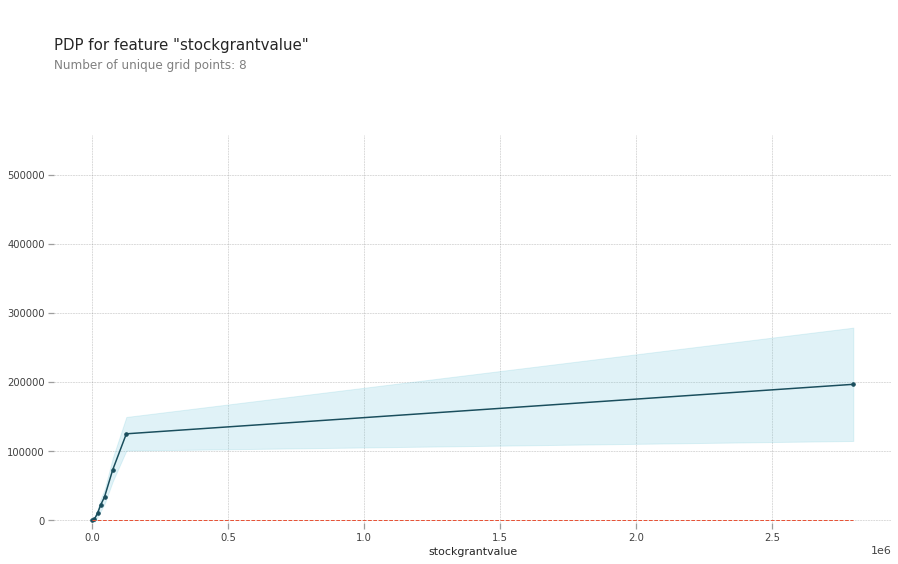

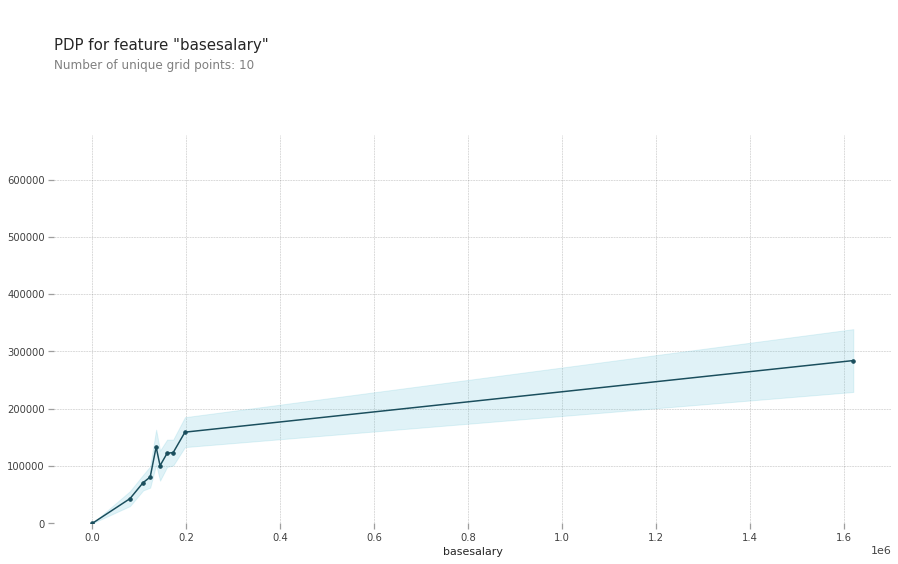

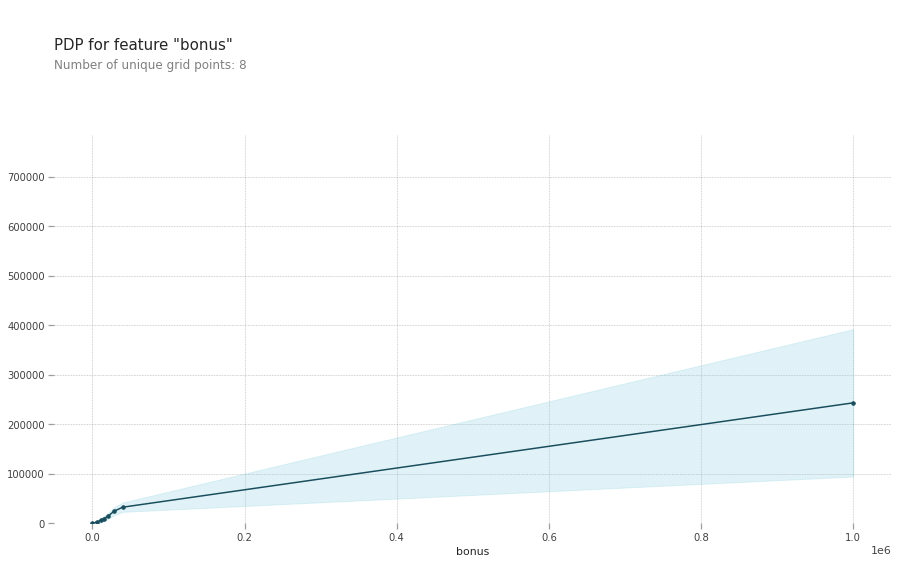

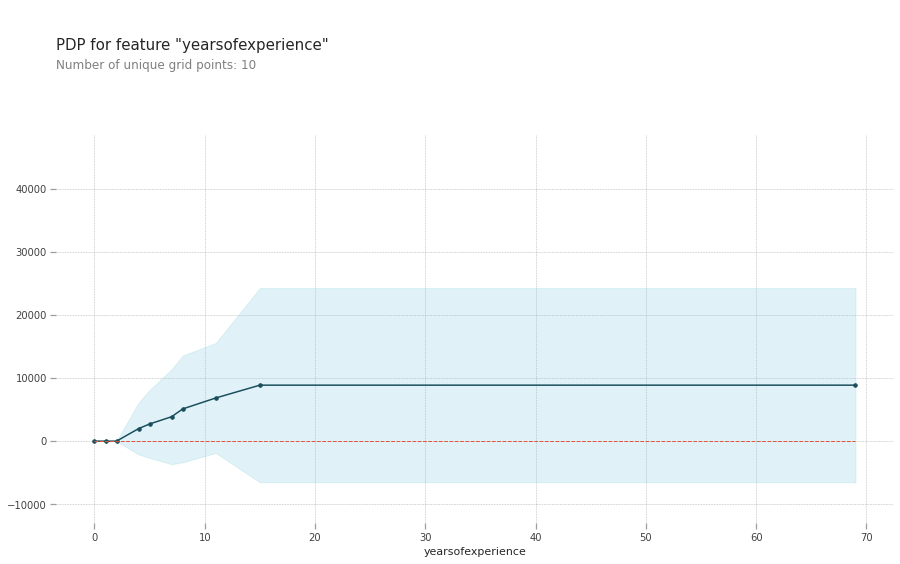

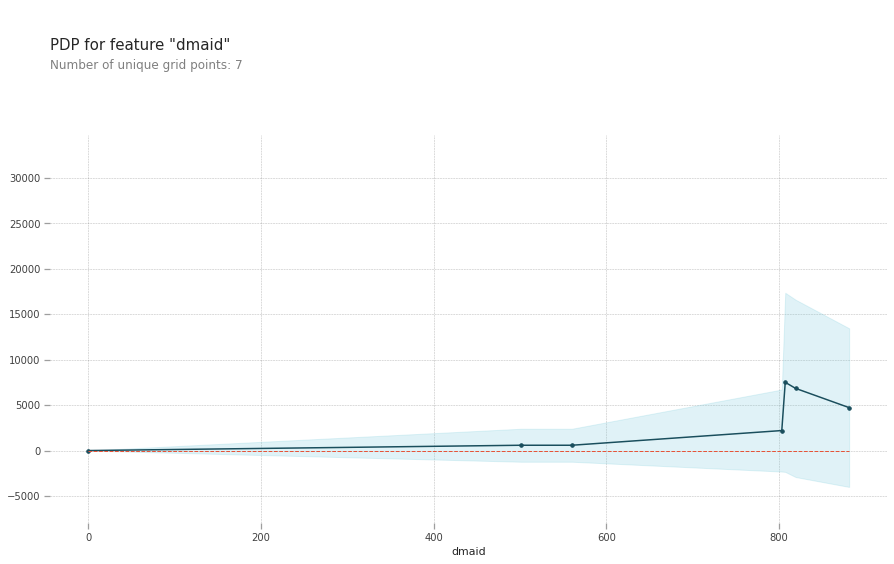

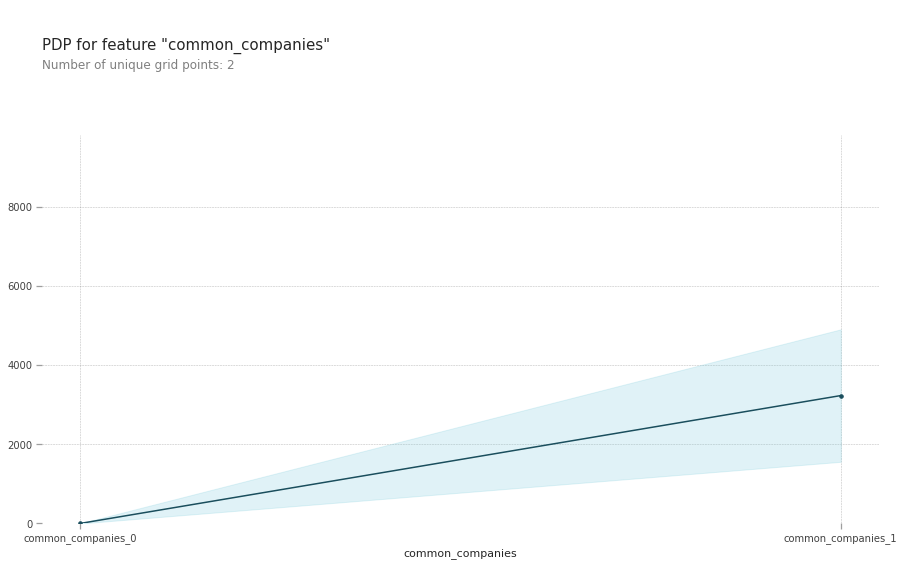

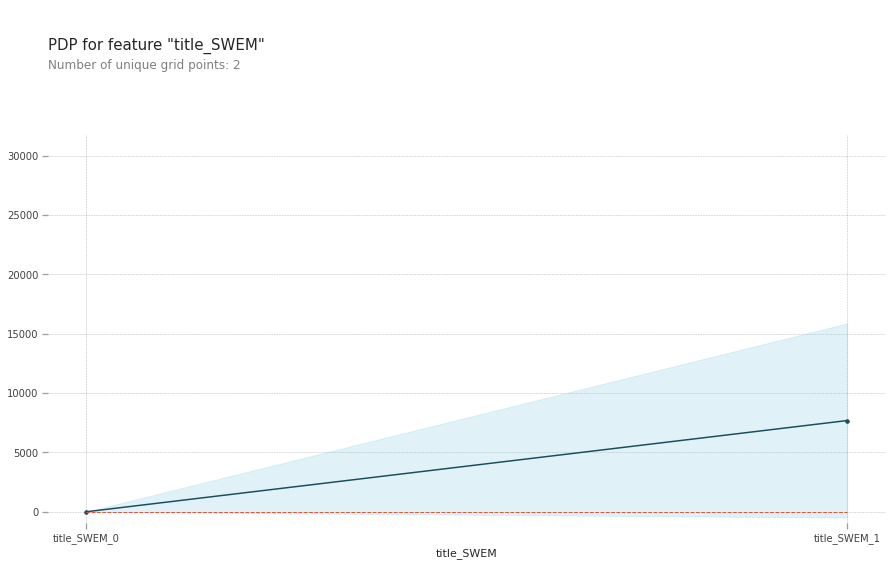

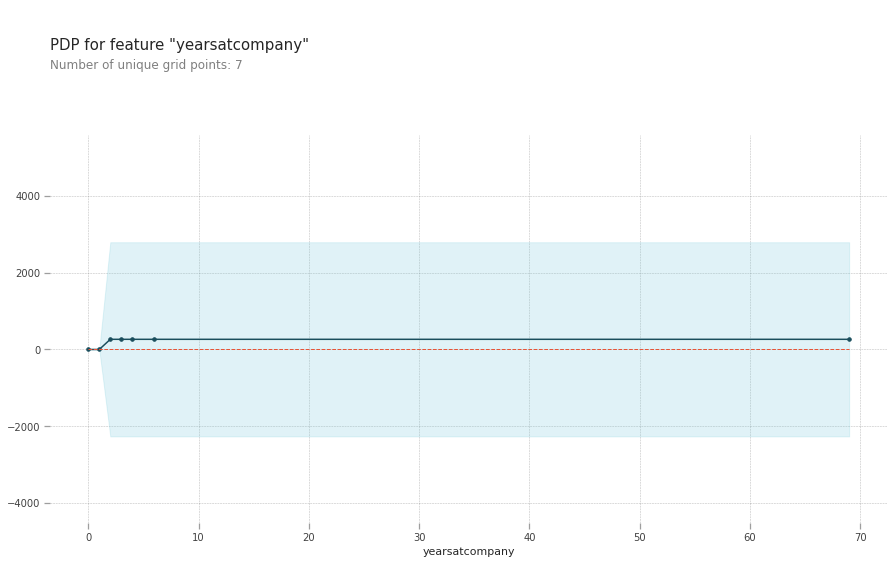

In [ ]:
shap.initjs();

train5, test5=train_test_split(df, test_size=0.2, random_state=42)
X_train5=train5[features]
y_train5=train5[target]

X_test5=test5[features]
y_test5=test5[target]

model = xgboost.XGBRegressor().fit(X_train5, y_train5)

def draw_pdp(feature, model, X_val, num_grid_points=10):
  isolated=pdp_isolate(
      model=model,
      dataset=X_val,
      model_features=X_val.columns,
      feature=feature,
      grid_type='percentile',
      num_grid_points=num_grid_points
  )

  return pdp_plot(isolated, feature_name=feature)


for feature in features:
  draw_pdp(feature, model, X_train)
  plt.show()